In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [273]:
data=pd.read_csv('diabetes.csv')
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [274]:
data.isna()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

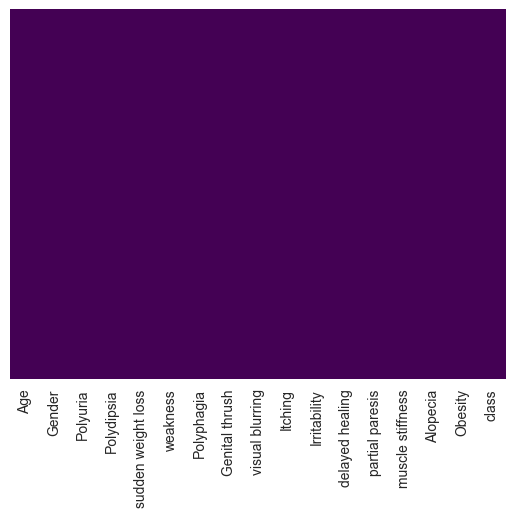

In [275]:
sns.heatmap(data.isna(),cbar=False,yticklabels=False,cmap='viridis')

<Axes: ylabel='Age'>

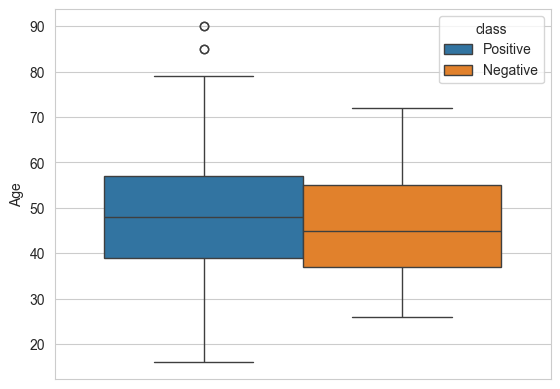

In [276]:
sns.boxplot(data=data,y='Age',hue='class')

<Axes: xlabel='class', ylabel='Count'>

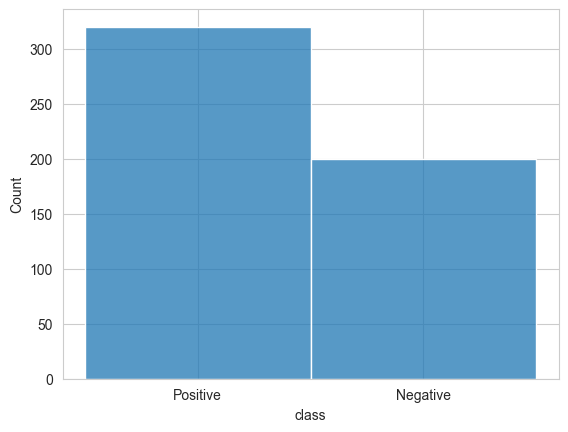

In [277]:
sns.histplot(data['class'])

<Axes: xlabel='class', ylabel='Count'>

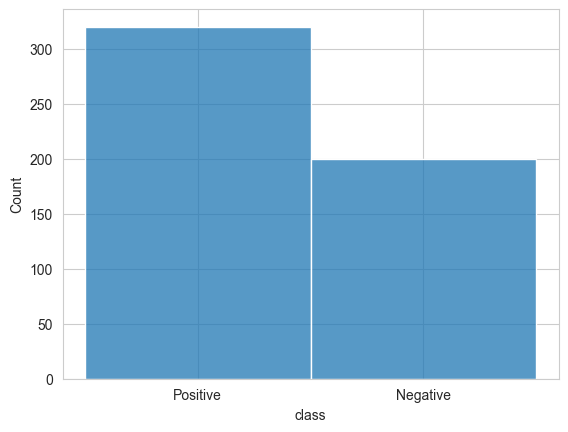

In [278]:
sns.set_style('whitegrid')
sns.histplot(data['class'])

In [279]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

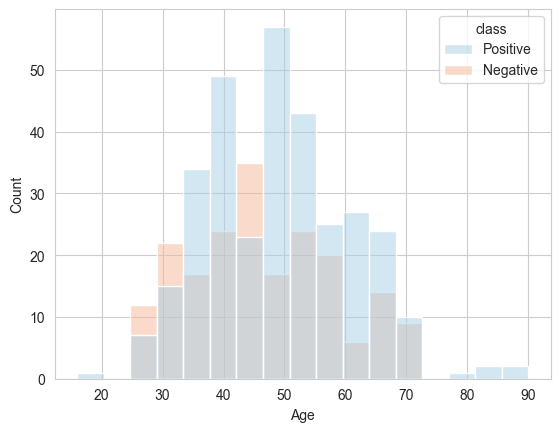

In [280]:
sns.histplot(x='Age',data=data,palette='RdBu_r',hue='class')

In [281]:
binary_features =data.columns.drop('Age')
binary_features =binary_features.drop('class')
binary_features =binary_features.drop('Gender')

In [282]:
for col in binary_features:
    data[col] = data[col].map(dict(Yes=1, No=0))

data['Gender'] = data['Gender'].map(dict(Male=1, Female=0))
data['class']   = data['class'].map(dict(Positive=1, Negative=0))


In [283]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [284]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix, classification_report

In [285]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('class',axis=1),data['class'],test_size=0.3,random_state=101)

In [286]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

ValueError: could not convert string to float: 'Female'

In [ ]:
predictions = model.predict(x_test)

In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.99      0.98      0.98        96

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156

[[59  1]
 [ 2 94]]


In [ ]:

trials.append(classification_report(y_test,predictions))

In [ ]:

print(trials[0])
print(trials[-1])


              precision    recall  f1-score   support

           0       0.85      0.95      0.90        60
           1       0.97      0.90      0.93        96

    accuracy                           0.92       156
   macro avg       0.91      0.92      0.91       156
weighted avg       0.92      0.92      0.92       156

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.99      0.98      0.98        96

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156

